<table style="width:100%">
<tr>
<td style="vertical-align:middle; text-align:left;">
<font size="2">
Supplementary code for the <a href="http://mng.bz/orYv">Build a Large Language Model From Scratch</a> book by <a href="https://sebastianraschka.com">Sebastian Raschka</a><br>
<br>Code repository: <a href="https://github.com/rasbt/LLMs-from-scratch">https://github.com/rasbt/LLMs-from-scratch</a>
</font>
</td>
<td style="vertical-align:middle; text-align:left;">
<a href="http://mng.bz/orYv"><img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/cover-small.webp" width="100px"></a>
</td>
</tr>
</table>

# Score Correlation Analysis

- This notebook analyses the correlation between the different evaluation method scores

In [9]:
import json

with open("gpt4-model-1-response.json", "r") as file:
    gpt4_model_1 = json.load(file)

with open("llama3-8b-model-1-response.json", "r") as file:
    llama3_8b_model_1 = json.load(file)

## GPT-4 vs Llama 3 8B

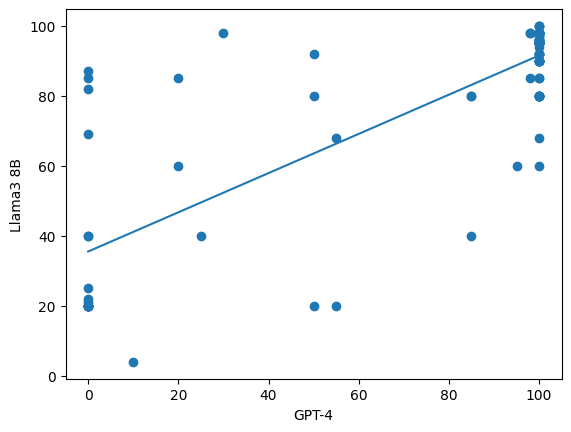

In [10]:
import numpy as np
import matplotlib.pyplot as plt


list1, list2 = gpt4_model_1, llama3_8b_model_1

plt.scatter(list1, list2)
plt.plot(
    np.unique(list1),
    np.poly1d(np.polyfit(list1, list2, 1))(np.unique(list1))
)
plt.xlabel("GPT-4")
plt.ylabel("Llama3 8B")
plt.show()

### Correlation Coefficients

In [13]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau

pearson_correlation = np.corrcoef(list1, list2)[0, 1]
spearman_correlation, _ = spearmanr(list1, list2)
kendall_tau_correlation, _ = kendalltau(list1, list2)

correlation_table = pd.DataFrame({
    "Pearson": [pearson_correlation],
    "Spearman": [spearman_correlation],
    "Kendall Tau": [kendall_tau_correlation]
}, index=['Results'])

correlation_table

,Pearson,Spearman,Kendall Tau
Results,0.80489,0.698406,0.57292


- For comparison, below are the correlation coefficients from the Prometheus 2 paper by Kim et al. 2024 ([https://arxiv.org/abs/2405.01535](https://arxiv.org/abs/2405.01535)), which are all in the same ballpark as the ones reported for Llama 3 above
- Note that Prometheus 2 is a model specifically finetuned for LLM rating and evaluation 

#### Pearson

| Evaluator LM          | VICUNA Bench | VICUNA Bench  | MT Bench   | MT Bench      | FLASK      | FLASK         | FLASK     | Feedback Bench |
|-----------------------|--------------|---------------|------------|---------------|------------|---------------|-----------|----------------|
|                       | GPT-4-1106   | Claude-3-Opus | GPT-4-1106 | Claude-3-Opus | GPT-4-1106 | Claude-3-Opus | Humans    | GPT-4-0613     |
| LLAMA2-CHAT 7B        | 0.205        | 0.243         | 0.036      | 0.055         | 0.317      | 0.256         | 0.299     | 0.523          |
| LLAMA2-CHAT 13B       | 0.185        | 0.141         | -0.042     | -0.002        | 0.239      | 0.247         | 0.263     | 0.545          |
| LLAMA2-CHAT 70B       | 0.350        | 0.463         | 0.178      | 0.228         | 0.388      | 0.402         | 0.317     | 0.592          |
| MISTRAL-INSTRUCT-7B   | 0.486        | 0.561         | 0.284      | 0.396         | 0.448      | 0.437         | 0.377     | 0.586          |
| MIXTRAL-INSTRUCT-8X7B | 0.566        | 0.579         | 0.551      | 0.539         | 0.483      | 0.495         | 0.420     | 0.673          |
| **PROMETHEUS-7B**     | **0.484**    | **0.528**     | **0.378**  | **0.382**     | **0.352**  | **0.331**     | **0.348** | **0.847**      |
| **PROMETHEUS-13B**    | **0.492**    | **0.534**     | **0.404**  | **0.477**     | **0.462**  | **0.470**     | **0.449** | **0.860**      |
| AUTO-J (13B)          | 0.351        | 0.262         | 0.432      | 0.375         | 0.430      | 0.370         | 0.473     | 0.637          |
| **PROMETHEUS-2-7B**   | **0.642**    | **0.610**     | **0.543**  | **0.554**     | **0.645**  | **0.578**     | **0.544** | **0.878**      |
| **PROMETHEUS-2-8X7B** | **0.685**    | **0.635**     | **0.665**  | **0.614**     | **0.659**  | **0.626**     | **0.555** | **0.898**      |
| GPT-3.5-TURBO-0613    | 0.335        | 0.349         | 0.183      | 0.194         | 0.437      | 0.396         | 0.450     | 0.594          |
| GPT-4-1106            | /            | 0.694         | /          | 0.717         | /          | 0.736         | 0.679     | 0.753          |
| CLAUDE-3-OPUS         | 0.694        | /             | 0.717      | /             | 0.736      | /             | 0.573     | 0.788          |

#### Spearman

| Evaluator LM          | VICUNA Bench | VICUNA Bench  | MT Bench   | MT Bench      | MT Bench   | FLASK         | FLASK     | Feedback Bench |
|-----------------------|--------------|---------------|------------|---------------|------------|---------------|-----------|----------------|
|                       | GPT-4-1106   | Claude-3-Opus | GPT-4-1106 | Claude-3-Opus | GPT-4-1106 | Claude-3-Opus | Humans    | GPT-4-0613     |
| LLAMA2-CHAT 7B        | 0.236        | 0.255         | 0.084      | 0.089         | 0.301      | 0.244         | 0.279     | 0.511          |
| LLAMA2-CHAT 13B       | 0.178        | 0.179         | -0.025     | 0.044         | 0.206      | 0.222         | 0.224     | 0.543          |
| LLAMA2-CHAT 70B       | 0.348        | 0.466         | 0.197      | 0.252         | 0.391      | 0.389         | 0.298     | 0.585          |
| MISTRAL-INSTRUCT-7B   | 0.389        | 0.480         | 0.266      | 0.358         | 0.499      | 0.478         | 0.374     | 0.563          |
| MIXTRAL-INSTRUCT-8X7B | 0.476        | 0.556         | 0.545      | 0.517         | 0.505      | 0.500         | 0.386     | 0.659          |
| **PROMETHEUS-7B**     | **0.508**    | **0.528**     | **0.385**  | **0.349**     | **0.367**  | **0.326**     | **0.317** | **0.876**      |
| **PROMETHEUS-13B**    | **0.492**    | **0.534**     | **0.401**  | **0.470**     | **0.474**  | **0.454**     | **0.398** | **0.893**      |
| AUTO-J (13B)          | 0.337        | 0.297         | 0.408      | 0.365         | 0.402      | 0.358         | 0.408     | 0.623          |
| **PROMETHEUS-2-7B**   | **0.643**    | **0.584**     | **0.550**  | **0.524**     | **0.626**  | **0.569**     | **0.490** | **0.909**      |
| **PROMETHEUS-2-8X7B** | **0.660**    | **0.615**     | **0.669**  | **0.605**     | **0.642**  | **0.618**     | **0.496** | **0.912**      |
| GPT-3.5-TURBO-0613    | 0.319        | 0.354         | 0.192      | 0.198         | 0.446      | 0.390         | 0.374     | 0.565          |
| GPT-4-1106            | /            | 0.659         | /          | 0.721         | /          | 0.729         | 0.650     | 0.753          |
| CLAUDE-3-OPUS         | 0.659        | /             | 0.721      | /             | 0.729      | /             | 0.567     | 0.784          |

#### Kendall-Tau

| Evaluator LM          | VICUNA Bench | VICUNA Bench  | MT Bench   | MT Bench      | FLASK      | FLASK         | FLASK     | Feedback Bench |
|-----------------------|--------------|---------------|------------|---------------|------------|---------------|-----------|----------------|
|                       | GPT-4-1106   | Claude-3-Opus | GPT-4-1106 | Claude-3-Opus | GPT-4-1106 | Claude-3-Opus | Humans    | GPT-4-0613     |
| LLAMA2-CHAT 7B        | 0.183        | 0.203         | 0.065      | 0.070         | 0.229      | 0.186         | 0.211     | 0.419          |
| LLAMA2-CHAT 13B       | 0.145        | 0.146         | -0.019     | 0.037         | 0.160      | 0.174         | 0.174     | 0.453          |
| LLAMA2-CHAT 70B       | 0.282        | 0.382         | 0.150      | 0.196         | 0.310      | 0.310         | 0.221     | 0.487          |
| MISTRAL-INSTRUCT-7B   | 0.314        | 0.391         | 0.208      | 0.281         | 0.395      | 0.384         | 0.287     | 0.454          |
| MIXTRAL-INSTRUCT-8X7B | 0.395        | 0.468         | 0.433      | 0.419         | 0.410      | 0.408         | 0.304     | 0.551          |
| **PROMETHEUS-7B**     | **0.405**    | **0.425**     | **0.290**  | **0.263**     | **0.282**  | **0.251**     | **0.236** | **0.770**      |
| **PROMETHEUS-13B**    | **0.397**    | **0.434**     | **0.299**  | **0.352**     | **0.365**  | **0.352**     | **0.299** | **0.793**      |
| AUTO-J (13B)          | 0.282        | 0.242         | 0.303      | 0.272         | 0.312      | 0.282         | 0.312     | 0.515          |
| **PROMETHEUS-2-7B**   | **0.515**    | **0.478**     | **0.458**  | **0.421**     | **0.500**  | **0.454**     | **0.376** | **0.773**      |
| **PROMETHEUS-2-8X7B** | **0.559**    | **0.515**     | **0.535**  | **0.483**     | **0.526**  | **0.507**     | **0.388** | **0.800**      |
| GPT-3.5-TURBO-0613    | 0.255        | 0.287         | 0.148      | 0.157         | 0.360      | 0.315         | 0.298     | 0.489          |
| GPT-4-1106            | /            | 0.553         | /          | 0.590         | /          | 0.609         | 0.517     | 0.662          |
| CLAUDE-3-OPUS         | 0.553        | /             | 0.590      | /             | 0.609      | /             | 0.453     | 0.693          |